<a id='ldata'></a>
 <a id = "11115"></a><br>

<div>  
<h1><center style="background-color:#c0c0c0; color:black;"><strong>Customer Segmentation with K-Means Clustering </strong></center></h1>
</div>

<img src="https://miro.medium.com/max/720/1*y-YeqS_WLKjuR2Il0RPNsQ.jpeg" width="600">

<a id='ldata'></a>
 <a id = "11115"></a><br>

<div>  
<h1><center style="background-color:#c0c0c0; color:black;"><strong>TABLE OF CONTENTS </strong></center></h1>
</div>

1. [Description](#1)
2. [Loading libraries and data](#5)
3. [Understanding the data](#6)
4. [Missing values](#7)
5. [Categorical and Numerical Variable Analysis](#55)
6. [Data Visualization](#9)
7. [Data Manipulation - Preprocessing](#8)

8. [K-Means Clustering](#88)
    * [Task 1](#10)
        *  [Determining the Optimum Number of Clusters](#811)
        * [Elbow method](#812)
        * [Final Cluster](#813)
        * [Results](#814) 
        * [Results Visualization](#815)
        
  * [Task 2](#90)
        * [Determining the Optimum Number of Clusters](#901)
        * [Elbow method](#902)
        * [Final Cluster](#903)
        * [Results](#904) 
        * [Results Visualization](#905)     

<a id='ldata'></a>
 <a id = "1"></a><br>

<div>  
<h1><center style="background-color:#c0c0c0; color:black;"><strong>1. DESCRIPTION </strong></center></h1>
</div>
<a id="Description"></a>

<div style="border-radius:10px;
            border : black solid;
            background-color: #FFFFF;
            font-size:110%;
            text-align: left">

The dataset shows the customers which last purchases from the FLO store on Omnichannel(both online and offline shopping store)in 2020-2021. 
However, these customers have consist of infomation from their past shopping behavior.
 <a id = "4"></a><br>

    
Descriptions of Variables:

* **master_id**: Unique Customer Number

* **order_channel**: Which channel of the shopping platform is used (Android, IOS, Desktop, Mobile)

* **last_order_channel**: The channel where the most recent purchase was made

* **first_order_date**: Date of the customer's first purchase

* **last_order_channel**: Customer's previous shopping history

* **last_order_date_offline**: The date of the last purchase made by the customer on the offline platform

* **order_num_total_ever_online**: Total number of purchases made by the customer on the online platform

* **order_num_total_ever_offline**: Total number of purchases made by the customer on the offline platform

* **customer_value_total_ever_offline**: Total fees paid for the customer's offline purchases

* **customer_value_total_ever_online**: Total fees paid for the customer's online purchases

* **interested_in_categories_12**:  List of categories the customer has shopped in the last 12 months
  

<a id = "5" ></a>
# <span style="font-family:serif; font-size:28px;"> 2. Loading libraries and data</span>
<a id="loading"></a>

In [1]:
################################
# Unsupervised Learning
################################

import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import datetime as dt
from datetime import timedelta, date

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("flo_data_20k.csv", index_col=0)

In [3]:
df.shape

(19945, 11)

In [4]:
df.head(3)

,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
master_id,,,,,,,,,,,
cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN]
f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]"


In [5]:
df["customer_value_total"]=df["customer_value_total_ever_online"]+df["customer_value_total_ever_offline"]
df["order_num_total"]=df["order_num_total_ever_online"]+df["order_num_total_ever_offline"]
df[["first_order_date","last_order_date","last_order_date_online","last_order_date_offline"]]=df[["first_order_date","last_order_date","last_order_date_online","last_order_date_offline"]].astype('datetime64[ns]')

<a id = "6" ></a>
# <span style="font-family:serif; font-size:28px;"> 3. Understanding the data</span>
<a id = "Undertanding the data" ></a>

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_num_total_ever_online,19945.0,3.110855,4.225647,1.00,1.00,2.00,4.00,200.00
order_num_total_ever_offline,19945.0,1.913913,2.062880,1.00,1.00,1.00,2.00,109.00
customer_value_total_ever_offline,19945.0,253.922597,301.532853,10.00,99.99,179.98,319.97,18119.14
customer_value_total_ever_online,19945.0,497.321690,832.601886,12.99,149.98,286.46,578.44,45220.13
customer_value_total,19945.0,751.244287,895.402173,44.98,339.98,545.27,897.78,45905.10
order_num_total,19945.0,5.024768,4.742707,2.00,3.00,4.00,6.00,202.00


In [7]:
df.groupby("order_channel").agg({"customer_value_total_ever_online":"sum",
                                "customer_value_total_ever_offline":"sum"}).sort_values(by="customer_value_total_ever_online",ascending=False)  

,customer_value_total_ever_online,customer_value_total_ever_offline
order_channel,,
Android App,5448900.55,2370162.21
Mobile,1828428.97,1199754.19
Ios App,1772300.55,753699.38
Desktop,869451.04,740870.42


In [8]:
df.groupby("interested_in_categories_12").agg({"customer_value_total":"sum"}).sort_values(
    by="customer_value_total",ascending=False).head(5)  

,customer_value_total
interested_in_categories_12,
[AKTIFSPOR],2373965.87
[KADIN],1139066.02
[],1136553.55
"[KADIN, AKTIFSPOR]",1132049.56
[ERKEK],1106934.44


In [9]:
# #--------------------------------------------------------------------------------------------------------------------------#
# Top 5 customers with the most profits.
# #--------------------------------------------------------------------------------------------------------------------------#
df.groupby("master_id").agg({"customer_value_total":"sum"}).sort_values(
    by="customer_value_total",ascending=False).head(5) 

,customer_value_total
master_id,
5d1c466a-9cfd-11e9-9897-000d3a38a36f,45905.10
d5ef8058-a5c6-11e9-a2fc-000d3a38a36f,36818.29
73fd19aa-9e37-11e9-9897-000d3a38a36f,33918.10
7137a5c0-7aad-11ea-8f20-000d3a38a36f,31227.41
47a642fe-975b-11eb-8c2a-000d3a38a36f,20706.34


In [10]:
# #--------------------------------------------------------------------------------------------------------------------------#
# Top 5 customers with the most orders.
# #--------------------------------------------------------------------------------------------------------------------------#
df.groupby("master_id").agg({"order_num_total":"sum"}).sort_values(
    by="order_num_total",ascending=False).head(5) 

,order_num_total
master_id,
5d1c466a-9cfd-11e9-9897-000d3a38a36f,202.0
cba59206-9dd1-11e9-9897-000d3a38a36f,131.0
a57f4302-b1a8-11e9-89fa-000d3a38a36f,111.0
fdbe8304-a7ab-11e9-a2fc-000d3a38a36f,88.0
329968c6-a0e2-11e9-a2fc-000d3a38a36f,83.0


<a id = "7" ></a>
# <span style="font-family:serif; font-size:28px;"> 4. Missing values </span>
<a id = "missingvalue" ></a>

In [11]:
df.isnull().sum()

order_channel                        0
last_order_channel                   0
first_order_date                     0
last_order_date                      0
last_order_date_online               0
last_order_date_offline              0
order_num_total_ever_online          0
order_num_total_ever_offline         0
customer_value_total_ever_offline    0
customer_value_total_ever_online     0
interested_in_categories_12          0
customer_value_total                 0
order_num_total                      0
dtype: int64

<a id = "55" ></a>
# <span style="font-family:serif; font-size:28px;"> 5. Categorical and Numerical Variable Analysis </span>
<a id = "datavisualization" ></a>

In [12]:
def grab_col_names(dataframe):
    df=dataframe
    cat_th=len(dataframe)//20
    car_th=len(dataframe)//20


    # cat_cols, cat_but_car
    cat_cols_object = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if ((dataframe[col].nunique() < cat_th)and dataframe[col].nunique() < 15) and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols_object + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    

    dfx=pd.DataFrame(np.zeros((len(dataframe.columns), 5)),columns=["cat_cols","num_cols","cat_but_car","num_but_cat","cat_cols_object"])
    dfx.loc[:]="- - -"
    dfx.loc[0]=[len(cat_cols),len(num_cols),len(cat_but_car),len(num_but_cat),len(cat_cols_object)]
    dfx.loc[range(2,len(cat_cols)+2),"cat_cols"]=cat_cols
    dfx.loc[range(2,len(num_cols)+2),"num_cols"]=num_cols
    dfx.loc[range(2,len(cat_but_car)+2),"cat_but_car"]=cat_but_car
    dfx.loc[range(2,len(num_but_cat)+2),"num_but_cat"]=num_but_cat
    dfx.loc[range(2,len(cat_cols_object)+2),"cat_cols_object"]=cat_cols_object
    
    if len(cat_cols)>len(num_cols):
        #print(dfx.iloc[:len(cat_cols)+2])
        pass
    else:
        #print(dfx.iloc[:len(num_cols)+2])
        pass
    return cat_cols, num_cols, cat_but_car,cat_cols_object,dfx

cat_cols, num_cols, cat_but_car,cat_cols_object,dfx = grab_col_names(df)
dfx

,cat_cols,num_cols,cat_but_car,num_but_cat,cat_cols_object
0,3,10,0,0,3
1,- - -,- - -,- - -,- - -,- - -
2,order_channel,first_order_date,- - -,- - -,order_channel
3,last_order_channel,last_order_date,- - -,- - -,last_order_channel
4,interested_in_categories_12,last_order_date_online,- - -,- - -,interested_in_categories_12
5,- - -,last_order_date_offline,- - -,- - -,- - -
6,- - -,order_num_total_ever_online,- - -,- - -,- - -
7,- - -,order_num_total_ever_offline,- - -,- - -,- - -
8,- - -,customer_value_total_ever_offline,- - -,- - -,- - -
9,- - -,customer_value_total_ever_online,- - -,- - -,- - -


<a id = "9" ></a>
# <span style="font-family:serif; font-size:28px;"> 6. Data Visualization </span>
<a id = "datavisualization" ></a>

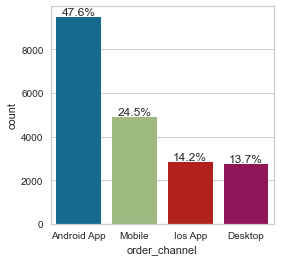

In [16]:
fig, ax = plt.subplots(figsize=(4,4))
sns.countplot(x=df["order_channel"], data=df, order = df["order_channel"].value_counts().index)
for c in ax.containers:
    labels = [f'{h/df["order_channel"].count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c,labels=labels, label_type='edge')

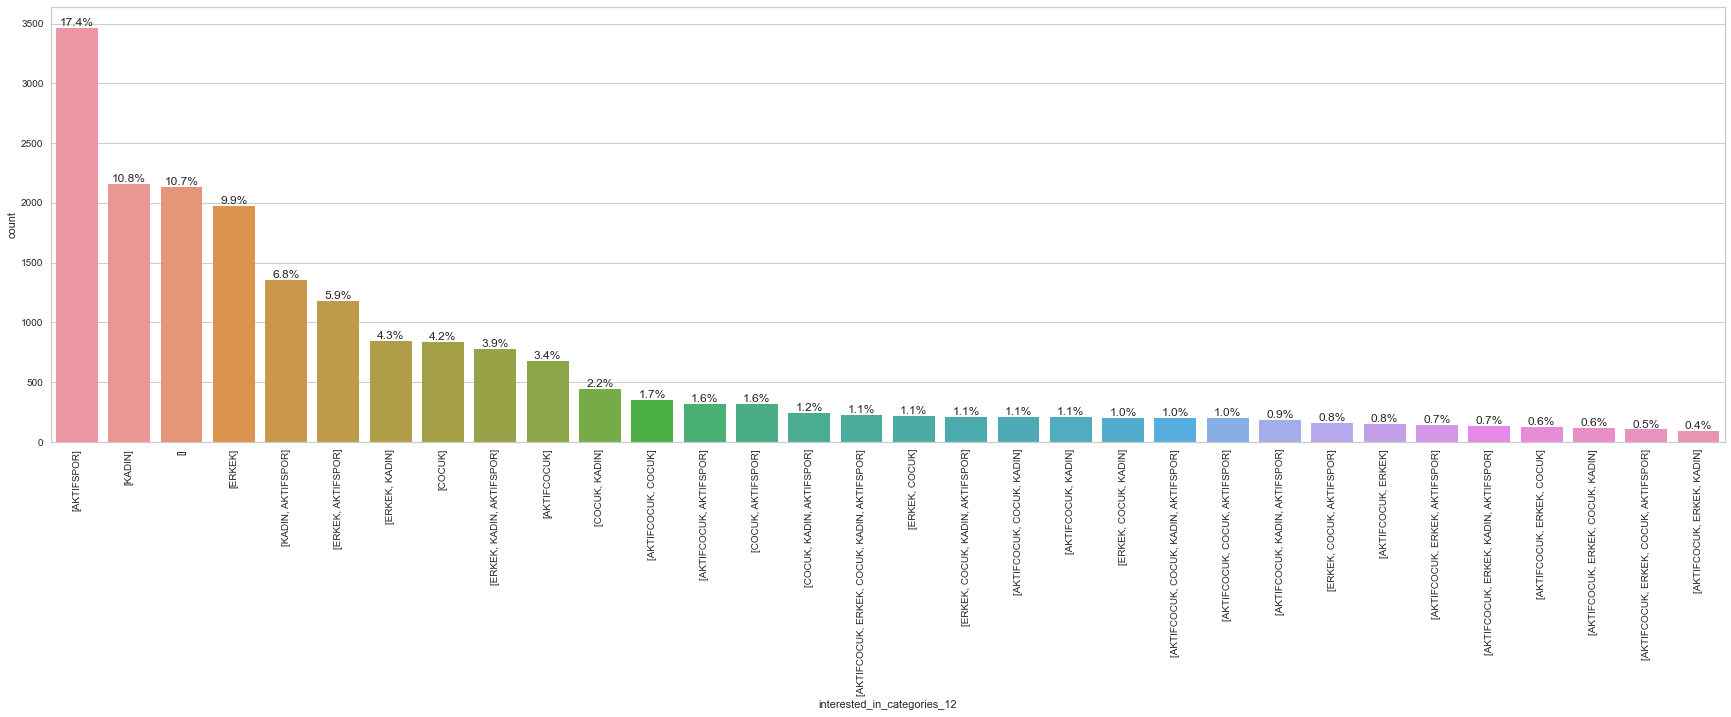

In [17]:
fig, ax = plt.subplots(figsize=(30,8))
sns.countplot(x=df["interested_in_categories_12"], data=df, order = df["interested_in_categories_12"].value_counts().index)
ax.tick_params(axis='x', rotation=90)
for c in ax.containers:
    labels = [f'{h/df["interested_in_categories_12"].count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c,labels=labels, label_type='edge')

<a id = "8" ></a>
# <span style="font-family:serif; font-size:28px;"> 7. Data Manipulation - Preprocessing </span>
<a id = "datavisualization" ></a>

In [18]:
df.head(1)

,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,customer_value_total,order_num_total
master_id,,,,,,,,,,,,,
cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],939.37,5.0


In [19]:
last_order_date_max = df["last_order_date"].max()
dfx = df.groupby('master_id').agg({'last_order_date': lambda last_order_date: (last_order_date_max - last_order_date),#.days, # recency
                                   'order_num_total': lambda order_num_total: order_num_total,#frequency
                                   'customer_value_total': lambda customer_value_total: customer_value_total}) # Monetary
dfx.last_order_date=[i.days for i in dfx.last_order_date]
dfx.head()

,last_order_date,order_num_total,customer_value_total
master_id,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,8,5.0,776.07
00034aaa-a838-11e9-a2fc-000d3a38a36f,296,3.0,269.47
000be838-85df-11ea-a90b-000d3a38a36f,211,4.0,722.69
000c1fe2-a8b7-11ea-8479-000d3a38a36f,25,7.0,874.16
000f5e3e-9dde-11ea-80cd-000d3a38a36f,18,7.0,1620.33


In [20]:
dfy=df[["interested_in_categories_12"]]
dfy.head(3)

,interested_in_categories_12
master_id,
cc294636-19f0-11eb-8d74-000d3a38a36f,[KADIN]
f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
69b69676-1a40-11ea-941b-000d3a38a36f,"[ERKEK, KADIN]"


In [21]:
dfy["UNSPECIFIED"]=0
dfy.loc[dfy[df["interested_in_categories_12"]=="[]"].index,"UNSPECIFIED"]=1
dfy[df["interested_in_categories_12"]=="[]"].head(3)

,interested_in_categories_12,UNSPECIFIED
master_id,,
cc7a587e-3110-11ea-b884-000d3a38a36f,[],1
af94d3c0-b199-11e9-89fa-000d3a38a36f,[],1
6d57890e-9f67-11eb-9c47-000d3a38a36f,[],1


In [22]:
interested_in_categories_12_uniques=set(df["interested_in_categories_12"].unique().sum().
                                        replace("["," ").
                                        replace("]"," ").
                                        replace(","," ").
                                        replace("   "," ").
                                        replace("  "," ").
                                        strip().
                                        split())
interested_in_categories_12_uniques

{'AKTIFCOCUK', 'AKTIFSPOR', 'COCUK', 'ERKEK', 'KADIN'}

In [23]:
for col in interested_in_categories_12_uniques:
    dfy[col]=0
    
    for index in dfy.index:
        if col in dfy.loc[index,"interested_in_categories_12"]:
            dfy.loc[index,col]=1
dfy.head(5)

,interested_in_categories_12,UNSPECIFIED,AKTIFSPOR,AKTIFCOCUK,COCUK,KADIN,ERKEK
master_id,,,,,,,
cc294636-19f0-11eb-8d74-000d3a38a36f,[KADIN],0,0,0,0,1,0
f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",0,1,0,1,1,1
69b69676-1a40-11ea-941b-000d3a38a36f,"[ERKEK, KADIN]",0,0,0,0,1,1
1854e56c-491f-11eb-806e-000d3a38a36f,"[AKTIFCOCUK, COCUK]",0,0,1,1,0,0
d6ea1074-f1f5-11e9-9346-000d3a38a36f,[AKTIFSPOR],0,1,0,0,0,0


In [24]:
dfx[dfy.columns[1:]]=dfy[dfy.columns[1:]]
dfx.head(5)

,last_order_date,order_num_total,customer_value_total,UNSPECIFIED,AKTIFSPOR,AKTIFCOCUK,COCUK,KADIN,ERKEK
master_id,,,,,,,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,8,5.0,776.07,0,1,0,1,0,1
00034aaa-a838-11e9-a2fc-000d3a38a36f,296,3.0,269.47,0,0,0,0,1,1
000be838-85df-11ea-a90b-000d3a38a36f,211,4.0,722.69,0,1,1,1,0,0
000c1fe2-a8b7-11ea-8479-000d3a38a36f,25,7.0,874.16,0,1,1,1,1,1
000f5e3e-9dde-11ea-80cd-000d3a38a36f,18,7.0,1620.33,0,1,0,0,0,1


<a id = "88" ></a>
# <span style="font-family:serif; font-size:28px;"> 8. K-Means Clustering </span>
<a id = "datavisualization" ></a>

**We have reached the final dataframe. Here we will group according to 2 different contents.**

* Task 1: Customers will be divided into groups according to their "monetary, frequency and recency"=="last_order_date, order_num_total,customer_value_total" values.

* Task 2: Customers will be grouped according to their "interested_in_categories_12" values.


<a id = "10" ></a>
# <span style="font-family:serif; font-size:28px;"> 80. Task 1 </span>
<a id = "datavisualization" ></a>

<img src="https://miro.medium.com/max/720/1*UV1HRkUupEMhjMwFkILavA.png" width="600">

In [25]:
dfx.head(3)

,last_order_date,order_num_total,customer_value_total,UNSPECIFIED,AKTIFSPOR,AKTIFCOCUK,COCUK,KADIN,ERKEK
master_id,,,,,,,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,8,5.0,776.07,0,1,0,1,0,1
00034aaa-a838-11e9-a2fc-000d3a38a36f,296,3.0,269.47,0,0,0,0,1,1
000be838-85df-11ea-a90b-000d3a38a36f,211,4.0,722.69,0,1,1,1,0,0


In [26]:
df_final_=dfx[["last_order_date","order_num_total","customer_value_total"]]
df_final_.columns=["recency","frequency" , "monetary"]
df_final_.head(3)

,recency,frequency,monetary
master_id,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,8,5.0,776.07
00034aaa-a838-11e9-a2fc-000d3a38a36f,296,3.0,269.47
000be838-85df-11ea-a90b-000d3a38a36f,211,4.0,722.69


In [27]:
sc = MinMaxScaler((0, 1)) # it's important to standardize on distance-based models
df_final = sc.fit_transform(df_final_)
df_final[0:5]

array([[0.02191781, 0.015     , 0.01594174],
       [0.8109589 , 0.005     , 0.0048951 ],
       [0.57808219, 0.01      , 0.01477776],
       [0.06849315, 0.025     , 0.01808063],
       [0.04931507, 0.025     , 0.0343512 ]])

<a id = "811" ></a>
# <span style="font-family:serif; font-size:28px;"> 801. Determining the Optimum Number of Clusters </span>
<a id = "datavisualization" ></a>

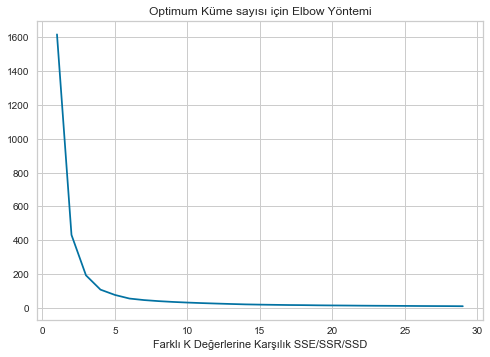

In [28]:
################################
# Determining the Optimum Number of Clusters
################################

kmeans = KMeans()
ssd = []
K = range(1, 30)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(df_final)
    ssd.append(kmeans.inertia_)

plt.plot(K, ssd, "bx-")
plt.xlabel("Farklı K Değerlerine Karşılık SSE/SSR/SSD")
plt.title("Optimum Küme sayısı için Elbow Yöntemi")
plt.show()

We can say that it is less than 5. To determine the exact number of clusters, let's re-examine the range values ​​by reducing them.

grup count : 1 --- kmeans.inertia_ : 1615 percentage of decline %: -0.0
grup count : 2 --- kmeans.inertia_ : 432 percentage of decline %: 0.73
grup count : 3 --- kmeans.inertia_ : 193 percentage of decline %: 0.55
grup count : 4 --- kmeans.inertia_ : 109 percentage of decline %: 0.43
grup count : 5 --- kmeans.inertia_ : 77 percentage of decline %: 0.29
grup count : 6 --- kmeans.inertia_ : 56 percentage of decline %: 0.27
grup count : 7 --- kmeans.inertia_ : 47 percentage of decline %: 0.15
grup count : 8 --- kmeans.inertia_ : 41 percentage of decline %: 0.12
grup count : 9 --- kmeans.inertia_ : 36 percentage of decline %: 0.11


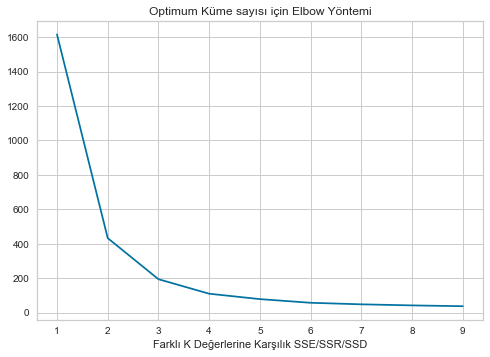

In [29]:
kmeans = KMeans()
ssd = []
K = range(1, 10)
kmeans_inertia__before=1615
for k in K:
    kmeans = KMeans(n_clusters=k).fit(df_final)
    ssd.append(kmeans.inertia_)
    
    diff=round((1-kmeans.inertia_/kmeans_inertia__before),2)
    print("grup count :",k,"---","kmeans.inertia_ :",int(kmeans.inertia_), "percentage of decline %:",diff)
    kmeans_inertia__before=int(kmeans.inertia_)
plt.plot(K, ssd, "bx-")
plt.xlabel("Farklı K Değerlerine Karşılık SSE/SSR/SSD")
plt.title("Optimum Küme sayısı için Elbow Yöntemi")
plt.show()

By examining these values, I decided to divide them into 4 separate groups. It can also be decided to divide into 2 or 3 groups. this decision should be made using business intelligence, taking into account goals and desires, and examining these values.

It seems quite logical in a 6-group. However, I decided that the value of 30% and the number of 4-groups was appropriate. You can change these numbers according to different targets.

<a id = "812" ></a>
# <span style="font-family:serif; font-size:28px;"> 802. Elbow method </span>
<a id = "datavisualization" ></a>

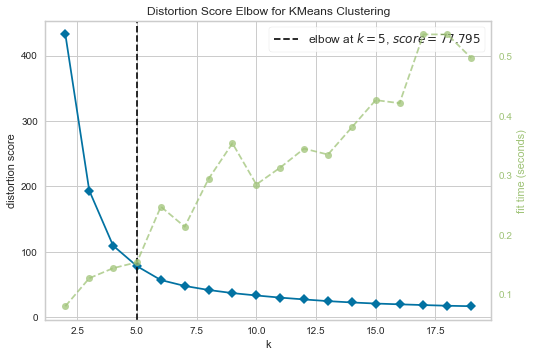

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2, 20))
elbow.fit(df_final)
elbow.show()

In [31]:
elbow.elbow_value_

5

When we use the elbow method, this method advises us to have 5 groups. The number of groups we found was also very close to this. Let's make the group number 5.We had already decided between the numbers 4 and 6. it doesn't bother us to accept the middle.

<a id = "813" ></a>
# <span style="font-family:serif; font-size:28px;"> 803. Final Cluster </span>
<a id = "datavisualization" ></a>

In [32]:
kmeans = KMeans(n_clusters=elbow.elbow_value_).fit(df_final)
kmeans.cluster_centers_

array([[0.90012897, 0.01060008, 0.01156563],
       [0.2687886 , 0.01526562, 0.01493464],
       [0.47808147, 0.01281397, 0.01392676],
       [0.07371368, 0.01859223, 0.01870717],
       [0.67603601, 0.0132231 , 0.01317279]])

In [33]:
clusters_kmeans = kmeans.labels_
clusters_kmeans

array([3, 0, 4, ..., 4, 1, 0])

In [34]:
df_final_["cluster"] = clusters_kmeans
df_final_.head()

,recency,frequency,monetary,cluster
master_id,,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,8,5.0,776.07,3
00034aaa-a838-11e9-a2fc-000d3a38a36f,296,3.0,269.47,0
000be838-85df-11ea-a90b-000d3a38a36f,211,4.0,722.69,4
000c1fe2-a8b7-11ea-8479-000d3a38a36f,25,7.0,874.16,3
000f5e3e-9dde-11ea-80cd-000d3a38a36f,18,7.0,1620.33,3


<a id = "814" ></a>
# <span style="font-family:serif; font-size:28px;"> 804. Results </span>
<a id = "datavisualization" ></a>

In [35]:
dfzz=df_final_.groupby("cluster").agg({"recency":["count","mean"],
                                 "frequency":["mean"],
                                 "monetary":["mean"]})
dfzz.columns=["Count"]+list(df_final_.columns[:-1])
dfzz

,Count,recency,frequency,monetary
cluster,,,,
0,2358,328.547074,4.120017,575.381158
1,5060,98.508498,5.038142,727.992012
2,3778,174.948121,4.582054,686.463618
3,6602,26.958800,5.714632,902.170865
4,2147,246.753144,4.644620,649.085869


In [36]:
for col in dfzz.columns:
    dfzz[col]/=dfzz[col].max()
dfzz=(dfzz.round(2)*100).astype(int)

Let's examine the groups according to their values

<a id = "815" ></a>
# <span style="font-family:serif; font-size:28px;"> 805. Results Visualization </span>
<a id = "datavisualization" ></a>

<AxesSubplot:ylabel='cluster'>

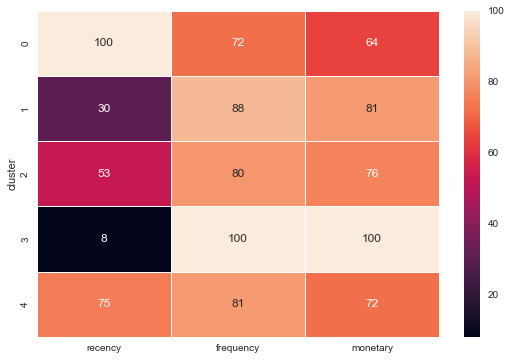

In [37]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(dfzz[dfzz.columns[1:]], annot=True, fmt="d", linewidths=.5, ax=ax)

All groups differ from each other due to some characteristics.

Great result 👍

<a id = "90" ></a>
# <span style="font-family:serif; font-size:28px;"> 90. Task 2 </span>
<a id = "datavisualization" ></a>

* Task 2: Customers will be grouped according to their "interested_in_categories_12" values.


<img src="https://blog.intercomassets.com/blog/wp-content/uploads/2020/10/Customer-segmentation-performance-matrix.png" width="600">

In [38]:
dfx.head(3)

,last_order_date,order_num_total,customer_value_total,UNSPECIFIED,AKTIFSPOR,AKTIFCOCUK,COCUK,KADIN,ERKEK
master_id,,,,,,,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,8,5.0,776.07,0,1,0,1,0,1
00034aaa-a838-11e9-a2fc-000d3a38a36f,296,3.0,269.47,0,0,0,0,1,1
000be838-85df-11ea-a90b-000d3a38a36f,211,4.0,722.69,0,1,1,1,0,0


In [39]:
df_final_=dfx[["UNSPECIFIED","ERKEK","AKTIFCOCUK","AKTIFSPOR","KADIN","COCUK"]]
df_final_.head(3)

,UNSPECIFIED,ERKEK,AKTIFCOCUK,AKTIFSPOR,KADIN,COCUK
master_id,,,,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,0,1,0,1,0,1
00034aaa-a838-11e9-a2fc-000d3a38a36f,0,1,0,0,1,0
000be838-85df-11ea-a90b-000d3a38a36f,0,0,1,1,0,1


In [40]:
sc = MinMaxScaler((0, 1)) # it's important to standardize on distance-based models
df_final = sc.fit_transform(df_final_)
df_final[0:5]

array([[0., 1., 0., 1., 0., 1.],
       [0., 1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0., 1.],
       [0., 1., 1., 1., 1., 1.],
       [0., 1., 0., 1., 0., 0.]])

<a id = "901" ></a>
# <span style="font-family:serif; font-size:28px;"> 901. Determining the Optimum Number of Clusters </span>
<a id = "datavisualization" ></a>

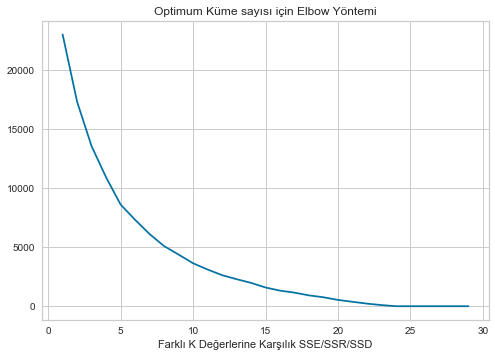

In [41]:
################################
# Determining the Optimum Number of Clusters
################################

kmeans = KMeans()
ssd = []
K = range(1, 30)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(df_final)
    ssd.append(kmeans.inertia_)

plt.plot(K, ssd, "bx-")
plt.xlabel("Farklı K Değerlerine Karşılık SSE/SSR/SSD")
plt.title("Optimum Küme sayısı için Elbow Yöntemi")
plt.show()

<a id = "902" ></a>
# <span style="font-family:serif; font-size:28px;"> 902. Elbow method </span>
<a id = "datavisualization" ></a>

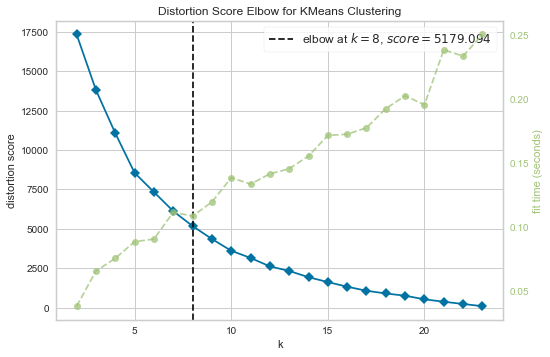

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [42]:
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2, 24))
elbow.fit(df_final)
elbow.show()

In [43]:
elbow.elbow_value_

8

The elbow method recommends that the number of groups be 9.

<a id = "903" ></a>
# <span style="font-family:serif; font-size:28px;"> 903. Final Cluster </span>
<a id = "datavisualization" ></a>

In [44]:
kmeans = KMeans(n_clusters=elbow.elbow_value_).fit(df_final)
kmeans.cluster_centers_[:3]

array([[-3.88578059e-16,  2.87982480e-01, -4.16333634e-16,
         1.83186799e-15,  1.00000000e+00,  1.77114700e-01],
       [-4.57966998e-16, -1.27675648e-15, -4.71844785e-16,
         1.00000000e+00,  1.05471187e-15,  8.38402539e-02],
       [-1.94289029e-16,  8.89610390e-02,  7.28571429e-01,
         1.68506494e-01,  1.37337662e-01,  1.00000000e+00]])

In [45]:
clusters_kmeans = kmeans.labels_
clusters_kmeans

array([7, 0, 2, ..., 4, 5, 0])

In [46]:
df_final_["cluster"] = clusters_kmeans
df_final_.head()

,UNSPECIFIED,ERKEK,AKTIFCOCUK,AKTIFSPOR,KADIN,COCUK,cluster
master_id,,,,,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,0,1,0,1,0,1,7
00034aaa-a838-11e9-a2fc-000d3a38a36f,0,1,0,0,1,0,0
000be838-85df-11ea-a90b-000d3a38a36f,0,0,1,1,0,1,2
000c1fe2-a8b7-11ea-8479-000d3a38a36f,0,1,1,1,1,1,6
000f5e3e-9dde-11ea-80cd-000d3a38a36f,0,1,0,1,0,0,7


<a id = "904" ></a>
# <span style="font-family:serif; font-size:28px;"> 904. Results </span>
<a id = "datavisualization" ></a>

In [47]:
dfzz=df_final_.groupby("cluster").agg({"UNSPECIFIED":["count","mean"],
                                 "ERKEK":["mean"],
                                 "AKTIFCOCUK":["mean"],
                                 "AKTIFSPOR":["mean"],
                                 "KADIN":["mean"],
                                 "COCUK":["mean"]})
dfzz.columns=["Count"]+list(df_final_.columns[:-1])
dfzz

,Count,UNSPECIFIED,ERKEK,AKTIFCOCUK,AKTIFSPOR,KADIN,COCUK
cluster,,,,,,,
0,3653,0.0,0.287982,0.000000,0.000000,1.000000,0.177115
1,3781,0.0,0.000000,0.000000,1.000000,0.000000,0.083840
2,3080,0.0,0.088961,0.728571,0.168506,0.137338,1.000000
3,2135,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,2188,0.0,1.000000,0.000000,0.000000,0.000000,0.098263
5,2368,0.0,0.327280,0.000000,1.000000,1.000000,0.101774
6,1406,0.0,0.724751,0.848506,0.854908,0.824324,1.000000
7,1334,0.0,1.000000,0.000000,1.000000,0.000000,0.116942


In [48]:
for col in dfzz.columns:
    dfzz[col]/=dfzz[col].max()
dfzz=(dfzz.round(2)*100).astype(int)

Let's examine the groups according to their values

<a id = "905" ></a>
# <span style="font-family:serif; font-size:28px;"> 905. Results Visualization </span>
<a id = "datavisualization" ></a>

<AxesSubplot:ylabel='cluster'>

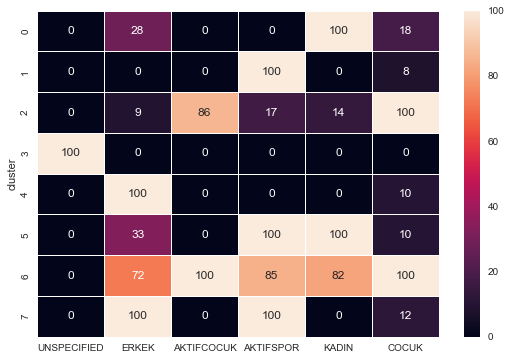

In [49]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(dfzz[dfzz.columns[1:]], annot=True, fmt="d", linewidths=.5, ax=ax)

All groups differ from each other due to some characteristics.

Great result 👍

<img src="https://amessagewithabottle.com/wp-content/uploads/2019/09/moneyball-1024x550.jpg" width="500">

I hope all of you did gain some insights to Machine Learning. Some other my notebooks for Machine Learning are: 

❖  **House Price** Prediction, EDA, ML, Visualization : https://www.kaggle.com/code/mustafayazici/house-price-eda-ml-visualization

❖  **Salary** Prediction with ML Models - ⚾Baseball  : https://www.kaggle.com/code/mustafayazici/salary-prediction-with-ml-models-basebal

❖ **Customer Churn** Prediction :https://www.kaggle.com/code/mustafayazici/telco-churn-prediction

❖ **Customer Churn** Prediction :https://www.kaggle.com/code/mustafayazici/telco-churn-prediction

❖ **PCA & Clustering :** https://www.kaggle.com/code/mustafayazici/makine-ogrenmesi-modeli-pca-clustering

❖ **User Based** Recommendation : https://www.kaggle.com/code/mustafayazici/user-based-recommendation-system

❖ **Content Based** Recommendation : https://www.kaggle.com/code/mustafayazici/content-based-recommendation

❖ **ARL** Recommendation : https://www.kaggle.com/code/mustafayazici/association-rule-learning-recommendation-system

❖ **My Kaggle** https://www.kaggle.com/mustafayazici/code

❖ **My github** https://github.com/Mustafa-YAZICI?tab=repositories

<img src="https://i.imgflip.com/4of9h0.jpg" width="300">

Please upvote if you liked the kernel! 😀

KEEP KAGGLING!